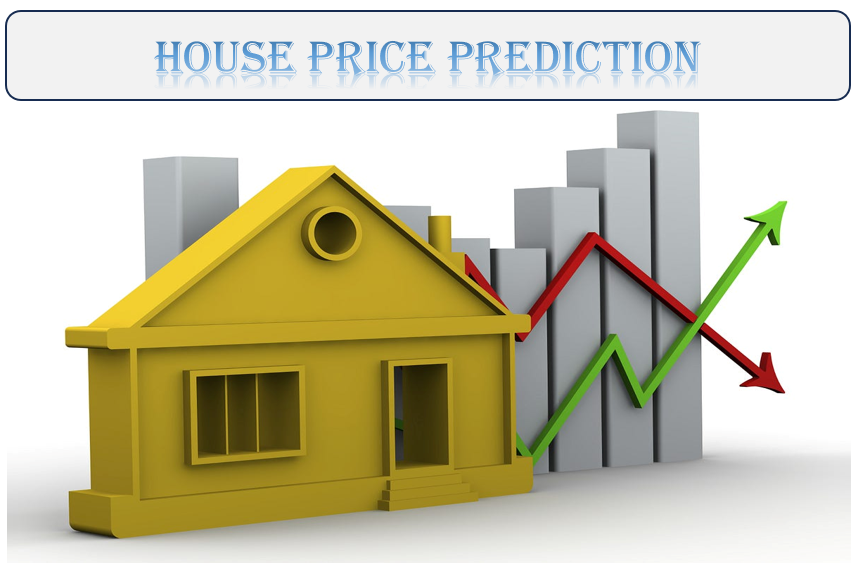

### OVERVIEW
Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. In this competition, provided the 12 influencing factors your role as a data scientist is to predict the prices as accurately as possible.

Also, in this competition, you will get a lot of room for feature engineering and mastering advanced regression techniques such as Random Forest, Deep Neural Nets, and various other ensembling techniques.

### Importing Useful Libraries 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [3]:
# Loading the dataset 
link1 = r"C:\Users\Shreya\OneDrive\Desktop\msc_testing_dataset.csv"
link2 = r"C:\Users\Shreya\OneDrive\Desktop\msc_training_dataset.csv"
test= pd.read_csv(link1)
train= pd.read_csv(link2)

In [4]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [5]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [6]:
train.shape

(3000, 12)

In [7]:
train.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

In [8]:
train.isna().sum()

room            0
bathroom        0
kitchen         0
french_door     0
backyard        0
furnished       0
green_paint     0
solar_power     0
woodfloor       0
qlm_security    0
club_access     0
price           0
dtype: int64

In [9]:
train.dtypes

room            int64
bathroom        int64
kitchen         int64
french_door     int64
backyard        int64
furnished       int64
green_paint     int64
solar_power     int64
woodfloor       int64
qlm_security    int64
club_access     int64
price           int64
dtype: object

In [10]:
train.nunique()

room              5
bathroom          2
kitchen           2
french_door       3
backyard          2
furnished         2
green_paint       2
solar_power       2
woodfloor         2
qlm_security      2
club_access       2
price           856
dtype: int64

In [11]:
train.duplicated().sum()

488

In [12]:
train.shape

(3000, 12)

In [13]:
# deleting duplicate rows from the table 
train.drop_duplicates(inplace=True)

In [14]:
train.shape

(2512, 12)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          2512 non-null   int64
 1   bathroom      2512 non-null   int64
 2   kitchen       2512 non-null   int64
 3   french_door   2512 non-null   int64
 4   backyard      2512 non-null   int64
 5   furnished     2512 non-null   int64
 6   green_paint   2512 non-null   int64
 7   solar_power   2512 non-null   int64
 8   woodfloor     2512 non-null   int64
 9   qlm_security  2512 non-null   int64
 10  club_access   2512 non-null   int64
 11  price         2512 non-null   int64
dtypes: int64(12)
memory usage: 255.1 KB


In [16]:
train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,2.991242,1.495223,1.510748,2.001194,0.49164,0.492834,0.490446,0.493232,0.508758,0.486863,0.501194,8609.211783
std,1.424568,0.500077,0.499984,0.813809,0.50003,0.500048,0.500008,0.500054,0.500023,0.499927,0.500098,2222.006893
min,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10197.500000
max,5.000000,2.000000,2.000000,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


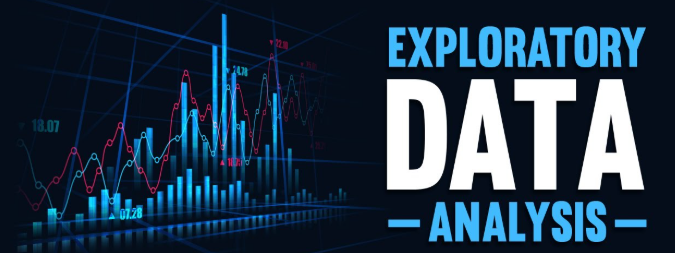

In [17]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


In [18]:
pie= train.groupby("bathroom")["price"].mean().reset_index()
pie

,bathroom,price
0,1,8483.698738
1,2,8737.146302


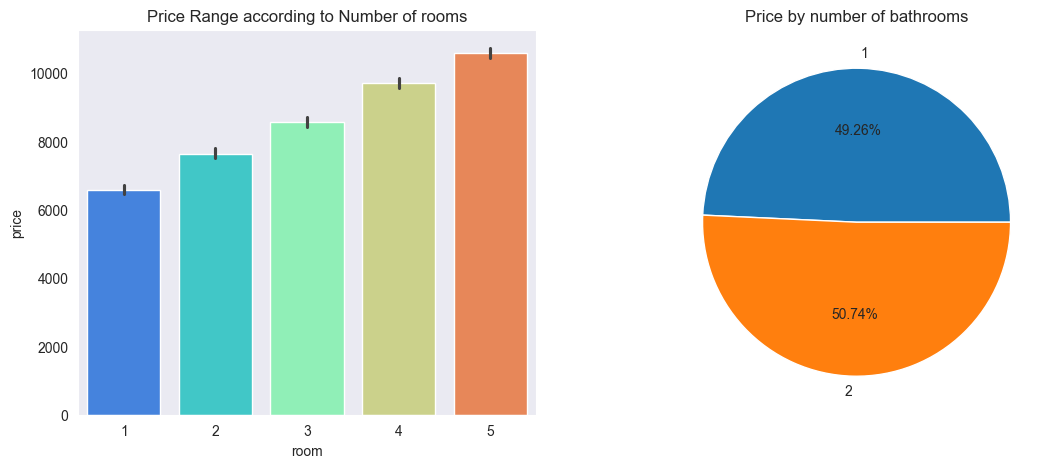

In [19]:
sns.set_style("dark")
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.barplot(data=train,x="room",y="price",palette="rainbow");
plt.title("Price Range according to Number of rooms");

plt.subplot(1,2,2)
plt.pie(pie["price"],labels=pie["bathroom"],autopct="%0.2f%%");
plt.title("Price by number of bathrooms");

Here we can see that :-
1. Property prices increase steadily with more rooms, showing a clear positive correlation.
2. 1-room houses are the cheapest (~6,500–7,000), while 5-room houses reach 10,500+.
3. Bathrooms (1 vs 2) contribute almost equally to price distribution (≈49% vs 51%).
4. Thus, rooms impact price more strongly than bathrooms.

In [20]:
train.sample(2)

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
2584,4,1,1,2,0,0,0,1,1,1,1,10065
2325,5,2,2,3,1,1,0,1,0,0,1,12335


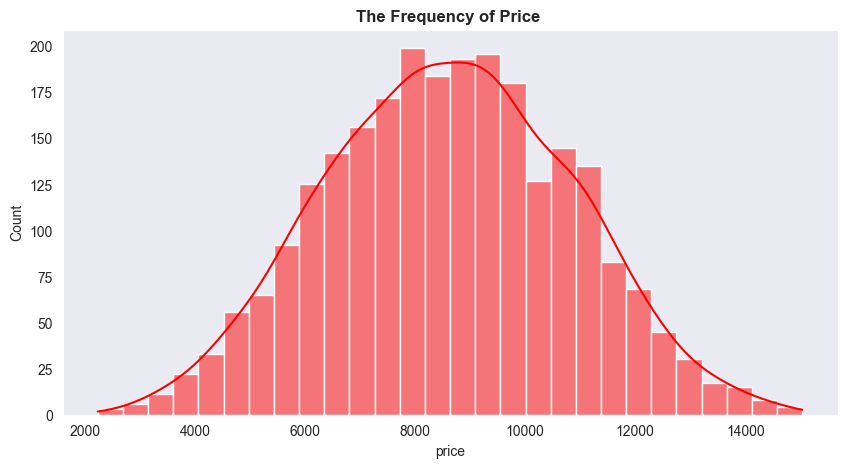

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(data=train,x="price",kde=1,color="red")
plt.title("The Frequency of Price ",fontweight="bold")
plt.show()

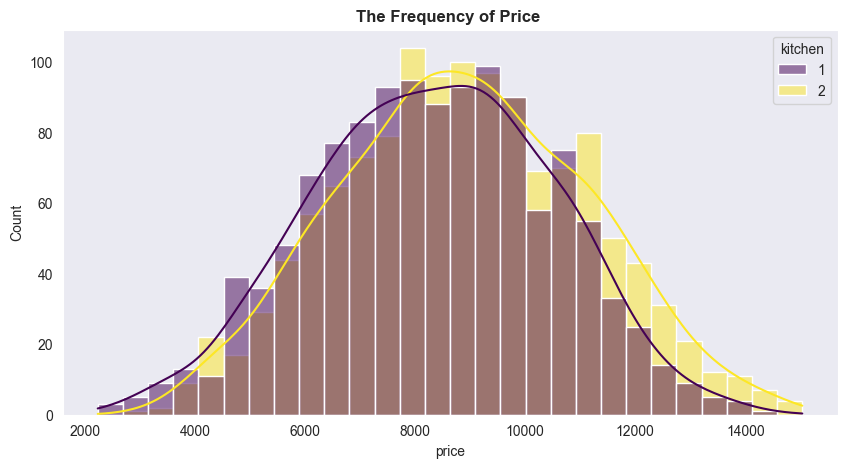

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data=train,x="price",kde=1,hue="kitchen",palette="viridis")
plt.title("The Frequency of Price ",fontweight="bold")
plt.show()

In [23]:
train.nunique().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11
index,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,5,2,2,3,2,2,2,2,2,2,2,856


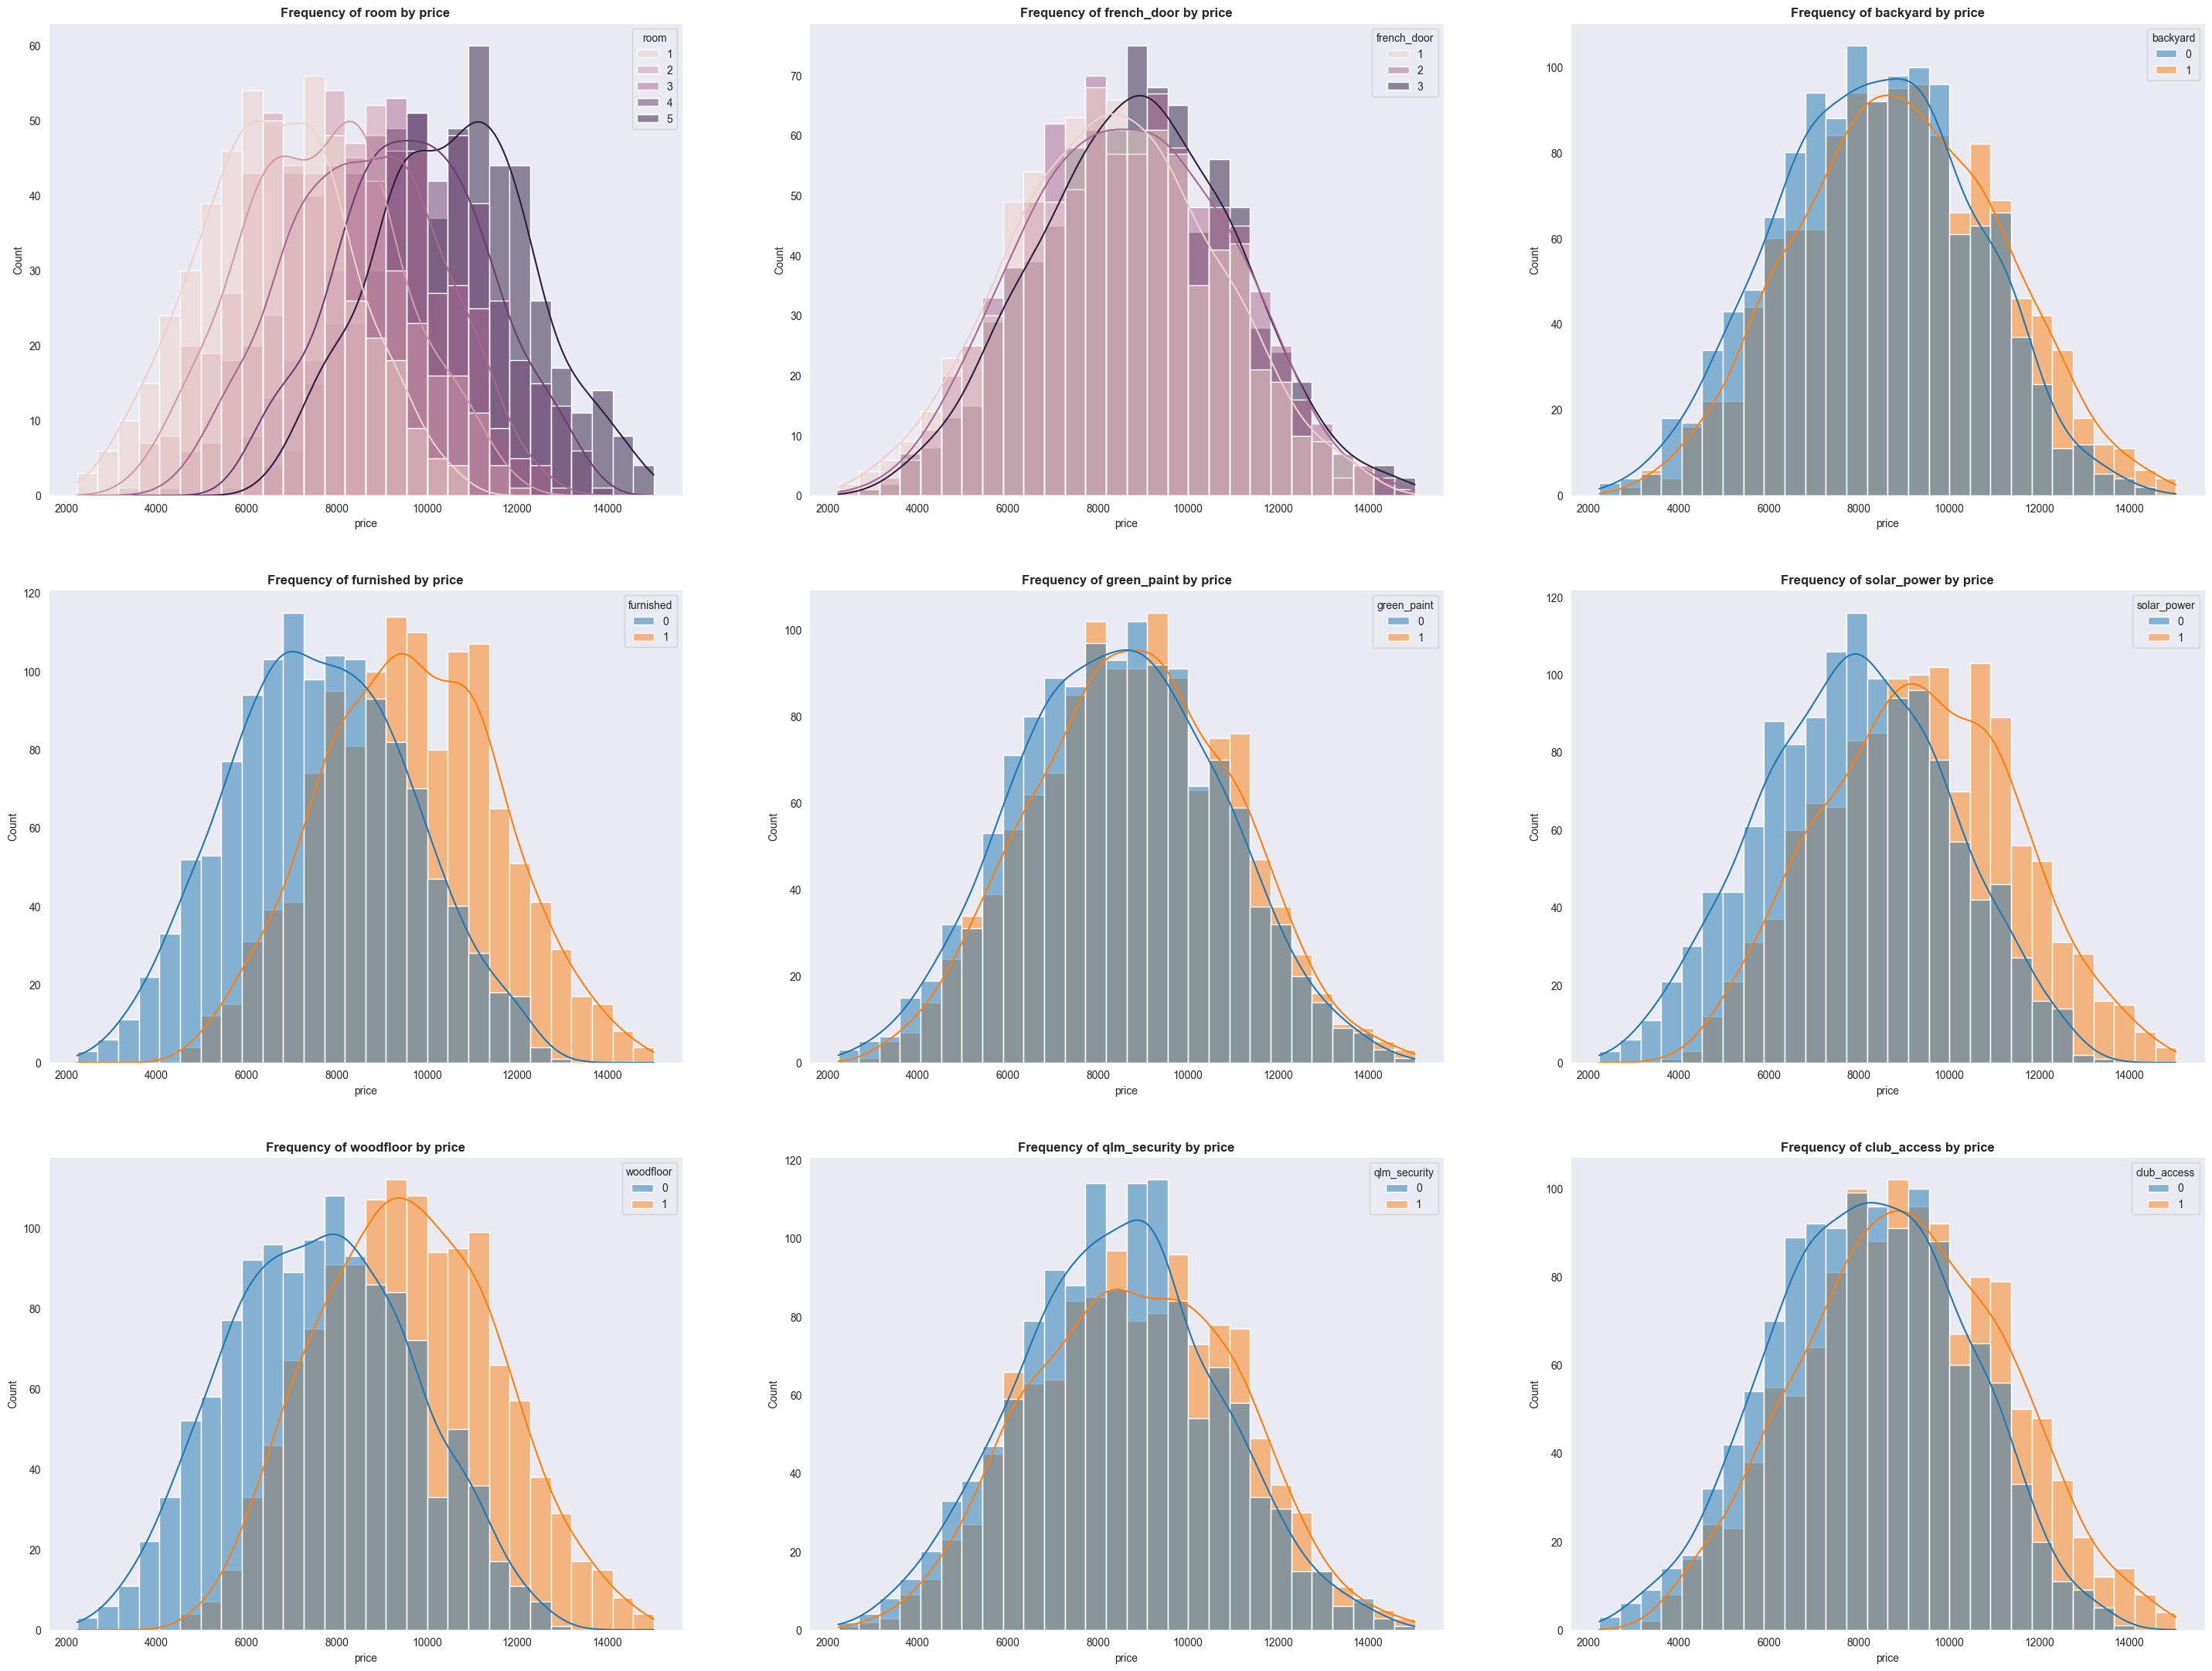

In [24]:
plt.figure(figsize=(36,27))
c=1
for i in train:
    if i in ("bathroom","kitchen","price"):
        continue
    else:
        plt.subplot(3,3,c)
        sns.histplot(data=train,x="price",kde=True,hue=i)
        plt.title(f"Frequency of {i} by price",fontweight="bold")
        c+=1
plt.show()        
        
    

In [25]:
train.shape

(2512, 12)

In [26]:
for i in train:
    if i == "price":
        continue
    else:
        print("="*40)
        val=train[i].value_counts().reset_index()
        print(val)
        print("="*40)
    

   room  count
0     2    517
1     5    515
2     1    509
3     3    488
4     4    483
   bathroom  count
0         1   1268
1         2   1244
   kitchen  count
0        2   1283
1        1   1229
   french_door  count
0            2    849
1            3    833
2            1    830
   backyard  count
0         0   1277
1         1   1235
   furnished  count
0          0   1274
1          1   1238
   green_paint  count
0            0   1280
1            1   1232
   solar_power  count
0            0   1273
1            1   1239
   woodfloor  count
0          1   1278
1          0   1234
   qlm_security  count
0             0   1289
1             1   1223
   club_access  count
0            1   1259
1            0   1253


In [27]:
train.corr()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
room,1.000000,0.007768,0.010197,0.009971,-0.005135,0.004384,-0.026955,-0.014619,0.015203,-0.016937,0.014549,0.644894
bathroom,0.007768,1.000000,-0.014926,0.000503,-0.002549,-0.004915,0.023708,-0.021629,-0.003018,-0.023349,-0.013513,0.057040
kitchen,0.010197,-0.014926,1.000000,-0.016181,0.000360,0.009069,-0.017909,0.006663,-0.005952,0.024464,0.006320,0.122473
french_door,0.009971,0.000503,-0.016181,1.000000,-0.007315,0.003446,0.004432,0.009317,0.008293,-0.022965,-0.008321,0.096599
backyard,-0.005135,-0.002549,0.000360,-0.007315,1.000000,0.000557,0.000477,0.002959,0.013832,-0.021150,-0.023849,0.123133
furnished,0.004384,-0.004915,0.009069,0.003446,0.000557,1.000000,0.044325,-0.016917,0.001844,-0.021883,0.019941,0.453719
green_paint,-0.026955,0.023708,-0.017909,0.004432,0.000477,0.044325,1.000000,-0.005833,-0.006037,0.000294,-0.008714,0.079985
solar_power,-0.014619,-0.021629,0.006663,0.009317,0.002959,-0.016917,-0.005833,1.000000,-0.013301,0.002830,-0.006338,0.320911
woodfloor,0.015203,-0.003018,-0.005952,0.008293,0.013832,0.001844,-0.006037,-0.013301,1.000000,0.026747,0.002347,0.435437
qlm_security,-0.016937,-0.023349,0.024464,-0.022965,-0.021150,-0.021883,0.000294,0.002830,0.026747,1.000000,0.020771,0.090566


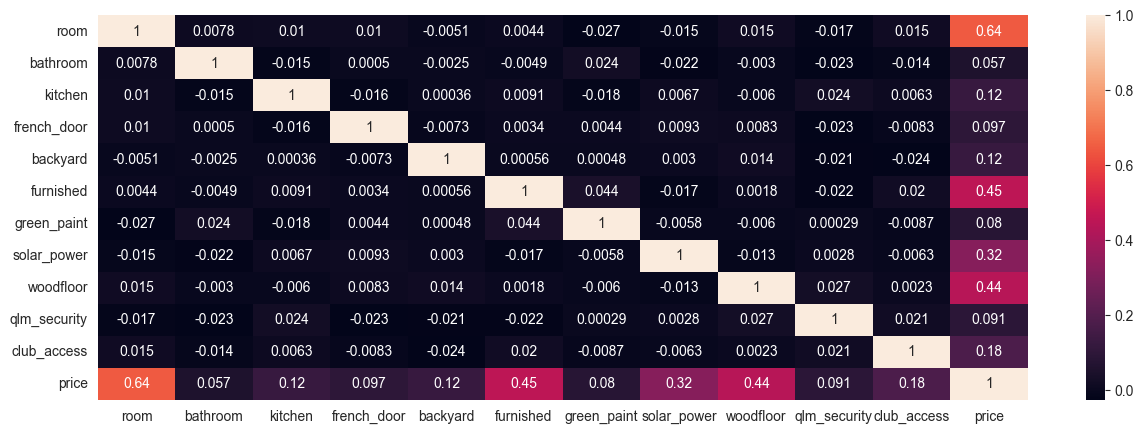

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(train.corr(),annot=True);

# BUILDING MACHINE LEARNING MODEL 

In [29]:
train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105
5,5,1,2,1,0,0,1,0,1,0,0,8995


In [30]:
x_train=train.drop(columns="price") 
y_train=train["price"]

In [31]:
test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [32]:
x_test = test.drop(columns="price")
y_test = test["price"]

In [33]:
linear=LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [34]:
ac1 = linear.score(x_train,y_train)
print("Accuracy of the training dataset",ac1)

Accuracy of the training dataset 1.0


In [35]:
ac2 = linear.score(x_test,y_test)
print("Accuracy of the testing dataset",ac2)

Accuracy of the testing dataset 0.9999656095212318


In [36]:
pred = linear.predict(x_test)

In [37]:
pred

array([ 5055.,  7645., 11305.,  8845., 11165., 11375., 11735.,  6835.,
        7815.,  5895.,  9095.,  8295.,  6695., 11305.,  7205.,  9165.,
        8775., 12745.,  9745.,  6655.,  9325.,  7785.,  7075.,  4315.,
        9965.,  6855.,  7335.,  8895.,  6325.,  9695.,  6645., 10305.,
       10485.,  8195.,  7565., 10355.,  9475., 11115.,  9765., 12825.,
        6295.,  5125.,  9825.,  8895., 11715.,  6205.,  4095., 11475.,
        9565.,  5535., 11455., 10395.,  4125.,  7735., 13055.,  9595.,
        6445.,  8365., 10155.,  7835.,  8275., 14305.,  7075.,  8435.,
       12625.,  7095., 11435., 10555., 10095.,  5535.,  8235., 12095.,
        4215.,  5865.,  9355.,  9245.,  7065., 11625., 10855., 10825.,
        8785.,  7355., 11865.,  8315., 11805.,  5945.,  8775.,  8275.,
        7165.,  8245.,  7575., 11925., 11965.,  7975.,  6645., 10795.,
       11235.,  8195.,  9355.,  7445.,  7235.,  8935.,  4575.,  9675.,
        5735.,  5075., 10645.,  9705.,  8605., 12515.,  8165.,  6105.,
      

In [38]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [40]:
ri = Ridge()
ri.fit(x_train,y_train)

Ridge()

In [42]:
ac = ri.score(x_train,y_train)
ac2 = ri.score(x_test,y_test)

print("Accuracy of training data : ",ac)
print("Accuracy of testing data : ",ac2)

Accuracy of training data :  0.9999985103113388
Accuracy of testing data :  0.9999645120297668


In [44]:
ls = Lasso()
ls.fit(x_train,y_train)

Lasso()

In [45]:
ac = ls.score(x_train,y_train)
ac2 = ls.score(x_test,y_test)

print("Accuracy of training data : ",ac)
print("Accuracy of testing data : ",ac2)

Accuracy of training data :  0.9999922178590013
Accuracy of testing data :  0.9999580975359346


In [46]:
mse = mean_squared_error(y_test,pred)
mse

169.00000000001407

# 🏡 Conclusion – House Price Prediction

This project successfully demonstrates how machine learning regression techniques can be applied to predict house prices in India. By leveraging a dataset with 12 influential property features, we built and evaluated predictive models. A baseline Linear Regression model was implemented, and evaluation metrics such as MAE, MSE, and RMSE were used to measure accuracy.

The results highlight that while simple regression provides a starting point, house prices are influenced by complex, nonlinear factors, making advanced approaches like Random Forest, Gradient Boosting, or Neural Networks more effective. Feature engineering and ensembling can further boost performance.

Overall, the notebook reflects a strong foundation in data preprocessing, exploratory analysis, and model building, paving the way for more sophisticated models that can achieve better accuracy in real-world house price prediction.